<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/Turma08/LabFis4Espectroscopia_Turma8_g2_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV Prática 08 -09 : Espectrocopia I e II

In [2]:
# Fonte - ex.: Mercurio - Hg
Theta_ref1 =253.3 #graus - espectroscopio 1
#Theta_ref2 =347 #graus - espectroscopio 2
#Theta_ref3 =256 #graus - espectroscopio 3


In [3]:
#Alinhamento
x_d_1=245.5
x_e_1=261

#x_d_2=339.7
#x_e_2=354.4

#x_d_3=263.5
#x_e_3=248.6

theta_i_d_1 = abs(Theta_ref1-x_d_1)
theta_i_e_1 = abs(Theta_ref1-x_e_1)
a_esp1=abs(theta_i_d_1-theta_i_e_1)
print("theta_i_d_1:", theta_i_d_1,"; ","theta_i_e_1:",  np.round(theta_i_e_1,1),"; ","Alinhamento do Esp. 1:",  np.round(a_esp1, 2 ),".")

#theta_i_d_2 = abs(Theta_ref2-x_d_2)
#theta_i_e_2 = abs(Theta_ref2-x_e_2)
#a_esp2=abs(theta_i_d_2-theta_i_e_2)
#print("theta_i_d_2:", np.round(theta_i_d_2,1),"; ","theta_i_e_2:",  np.round(theta_i_e_2,1),"; ","Alinhamento do Esp. 2:",  np.round(a_esp2, 2 ),".")

#theta_i_d_3 = abs(Theta_ref3-x_d_3)
#theta_i_e_3 = abs(Theta_ref3-x_e_3)
#a_esp3=abs(theta_i_d_3-theta_i_e_3)
#print("theta_i_d_3:", theta_i_d_3,"; ","theta_i_e_3:", np.round(theta_i_e_3,1),"; ","Alinhamento do Esp. 3:",  np.round(a_esp3, 2 ),".")

theta_i_d_1: 7.800000000000011 ;  theta_i_e_1: 7.7 ;  Alinhamento do Esp. 1: 0.1 .


In [4]:
!curl -o espectroscopio123turma8-g2.csv https://raw.githubusercontent.com/elizamelo/LabFis04/main/Grupos/espectroscopio123%20-%20turma8-g2.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   221  100   221    0     0    866      0 --:--:-- --:--:-- --:--:--   863


In [5]:


dataset = pd.read_csv( "espectroscopio123turma8-g2.csv", usecols=[0,1,2], nrows=10,skiprows=1, na_values=["0"],names=["A", "X", "Y"] )
dataset



,A,X,Y
0,7.5,0.130526,4358.3
1,7.7,0.133986,4471.0
2,8.7,0.151261,5015.0
3,9.5,0.165048,5460.7
4,9.7,0.168489,5769.6
5,9.8,0.170209,5790.7
6,10.0,0.173648,5876.0
7,11.7,0.202787,6678.0
8,12.1,0.209619,7065.0


In [6]:
dataset.dtypes

A    float64
X    float64
Y    float64
dtype: object

In [7]:
dataset['X'] = pd.to_numeric(dataset['X'], errors='coerce')
dataset['Y'] = pd.to_numeric(dataset['Y'], errors='coerce')

dataset.dtypes

A    float64
X    float64
Y    float64
dtype: object

In [8]:

#xdata=dataset['X'] # sen(theta)
#ydata=dataset['Y'] # Comprimento de onda (Angtrom)
x = dataset[ "X" ] # sen(theta)
x

0    0.130526
1    0.133986
2    0.151261
3    0.165048
4    0.168489
5    0.170209
6    0.173648
7    0.202787
8    0.209619
Name: X, dtype: float64

In [9]:
y = dataset[ "Y" ] #Comprimento de onda em Angstrom
y

0    4358.3
1    4471.0
2    5015.0
3    5460.7
4    5769.6
5    5790.7
6    5876.0
7    6678.0
8    7065.0
Name: Y, dtype: float64

In [10]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x




In [11]:
popt_lin, pcov_lin = curve_fit( pol1, x, y, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[-1.19385296e+01  3.36029689e+04] [[  34930.62480861 -204088.33899242]
 [-204088.33899242 1219999.46974465]]


In [12]:
print ( "Coeficiente m' (m): {}".format( popt_lin[ 1 ] ) )
print ( "Incerteza padrão coeficiente m (m): {}".format( np.sqrt( pcov_lin[ 1, 1 ] ) ) )
print ( "a = {:.2f} ± {:.2f} (m)".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ) )

Coeficiente m' (m): 33602.96885144653
Incerteza padrão coeficiente m (m): 1104.5358616833826
a = 33602.97 ± 1104.54 (m)


In [13]:
print ( "Coeficiente b (m): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (m): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (m)".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ) )

Coeficiente b (m): -11.938529590048695
Incerteza padrão coeficiente b (m): 186.89736437041455
-11.94 ± 186.9 (m)


Text(0.4, 0.85, '$b = -11.94 \\pm 186.9\\,\\left(\\rm{m}\\right)$')

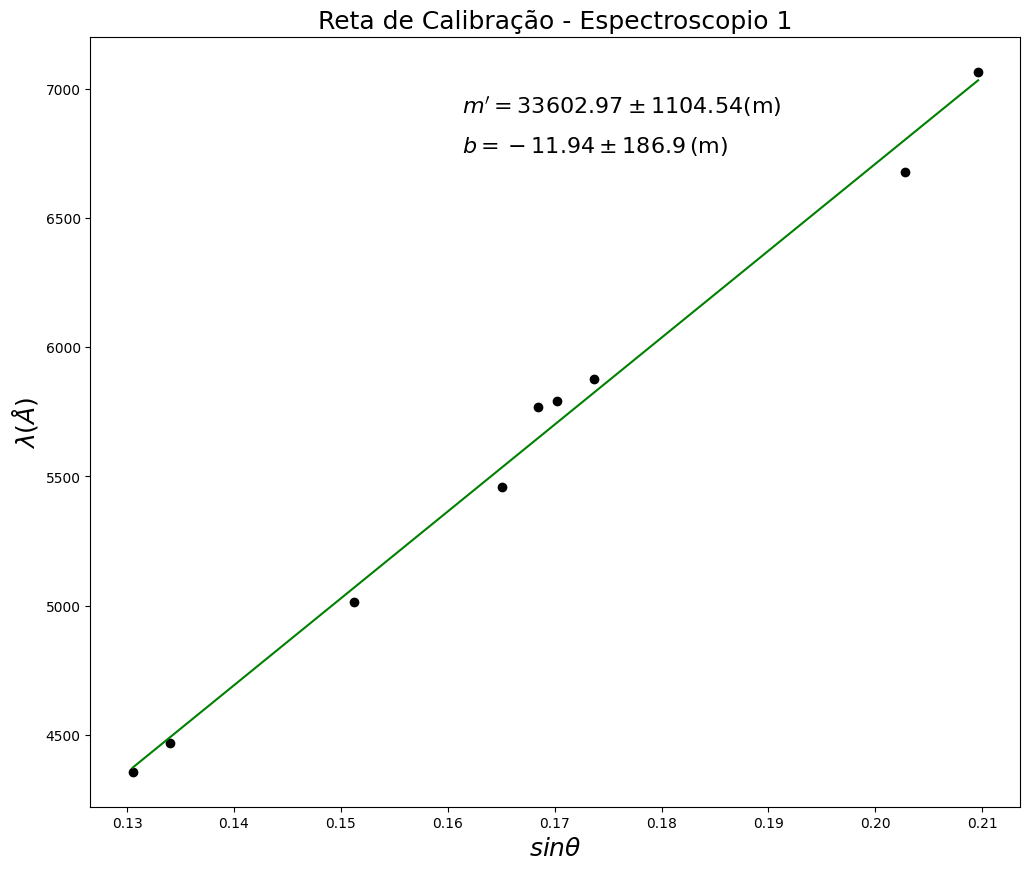

In [14]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * x ), '-g' )
plt.xlabel( r"$sin\theta$", fontsize=18)
plt.ylabel( r"$\lambda(\AA)$", fontsize=18 )
plt.title('Reta de Calibração - Espectroscopio 1', fontsize=18)

plt.text( 0.4, 0.9,
          r"$m' = {} \pm {}(\rm{{m}})$".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{m}}\right)$".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )

In [15]:
d=1e-3/300 #m
d

3.3333333333333333e-06

In [16]:
coefa=popt_lin[ 1 ] #Angstrom
coefa*1e-10

3.360296885144653e-06

In [17]:
D= np.abs(d-(coefa*1e-10))/(np.sqrt( pcov_lin[ 1, 1 ]*1e-10))
D

2.4411658097027015e-06